In [1]:
import pyrosm
from pyrosm.data import sources
import matplotlib.pyplot as plt

In [2]:
import geopandas as gpd

In [7]:
#osmdata = gpd.read_file(r"C:\Users\User\Documents\UNITN\Geospatial\raster\osm_pbf\overpass_dta_burgas\export.geojson")

In [4]:
municipalities = gpd.read_file("C:\\Users\\User\\Documents\\UNITN\\Geospatial\\raster\\municipalities.geojson")
municipalities.crs #4326
burgas_city = municipalities[municipalities.nuts4 == "BGS04"]
burgas_city

,nuts4,nuts3,geometry
179,BGS04,BGS,"POLYGON ((27.31800 42.49400, 27.28700 42.48700..."


In [5]:
bbox_geom = burgas_city['geometry'].values[0]

# BBBike data

In [6]:
osm3 = pyrosm.OSM(r"C:\Users\User\Documents\UNITN\Geospatial\raster\osm_pbf\bbbike\planet_27.161,42.374_27.675,42.603.osm.pbf", bounding_box= bbox_geom)

In [25]:
osm3.conf.tags.geological

['geological', 'moraine', 'outcrop', 'palaeontological_site']

In [26]:
osm3.conf.tags.available

['aerialway',
 'aeroway',
 'amenity',
 'boundary',
 'building',
 'craft',
 'emergency',
 'geological',
 'highway',
 'historic',
 'landuse',
 'leisure',
 'natural',
 'office',
 'power',
 'public_transport',
 'railway',
 'route',
 'place',
 'shop',
 'tourism',
 'waterway']

c:\Users\User\anaconda3\envs\geospatialenv\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


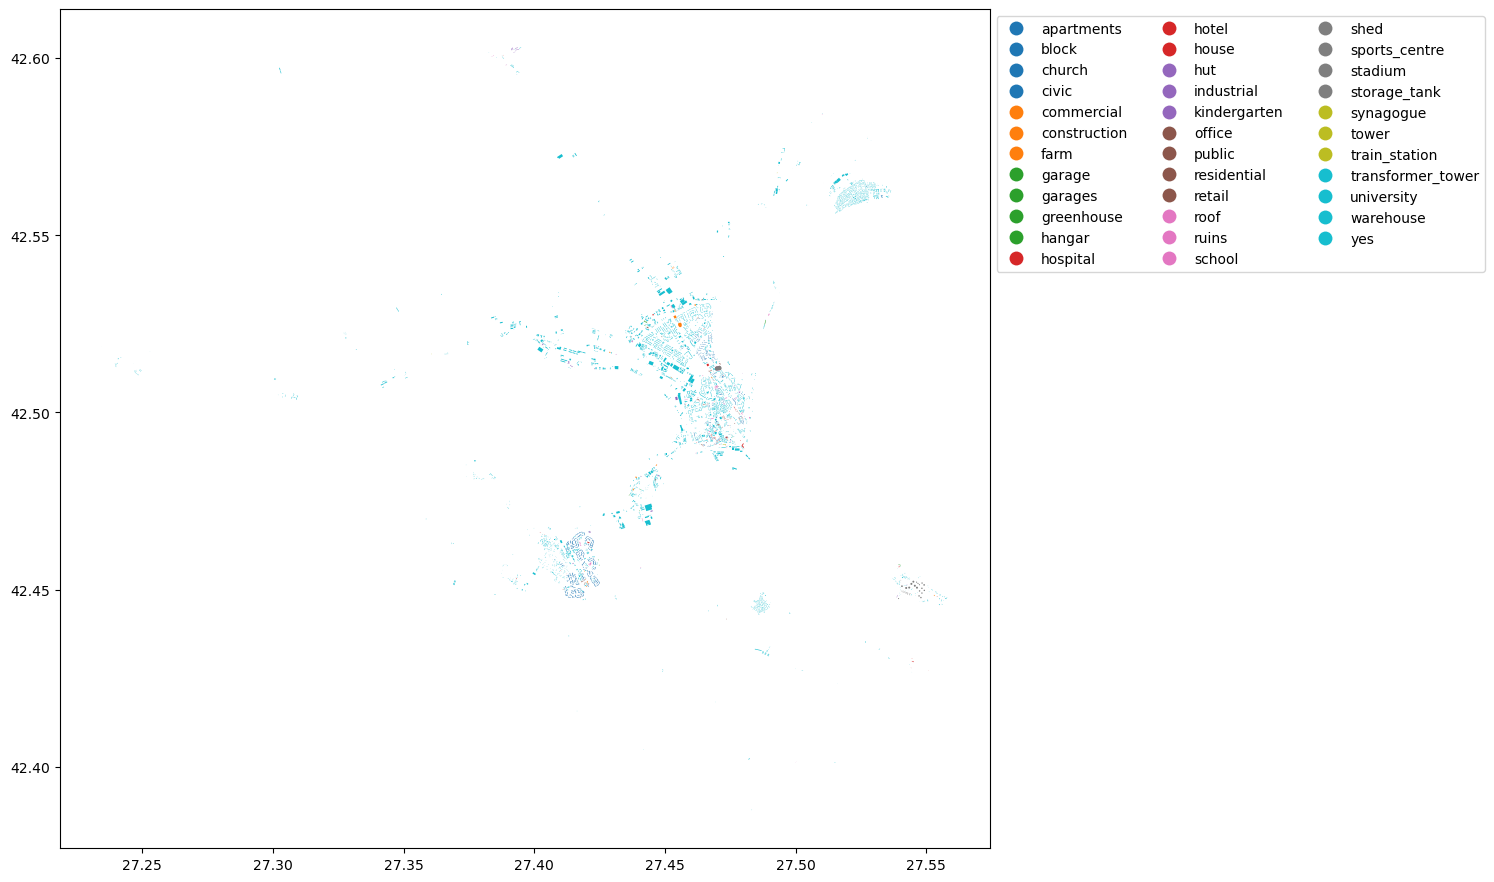

In [12]:
buildings = osm3.get_buildings()
buildings.plot(column="building", figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=3, bbox_to_anchor=(1, 1)))
plt.show()

c:\Users\User\anaconda3\envs\geospatialenv\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


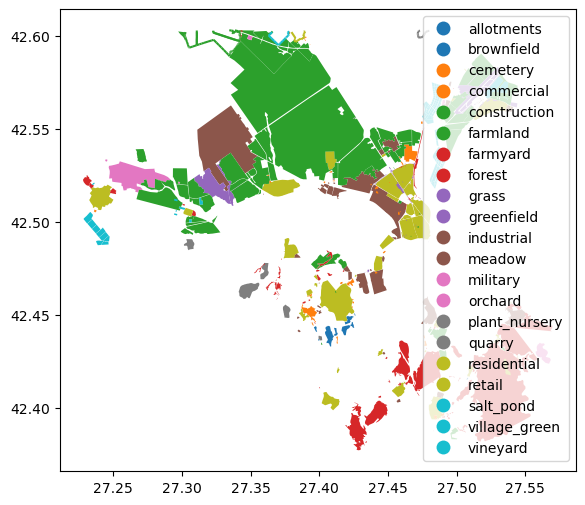

In [27]:
landuse = osm3.get_landuse()
landuse.plot(column='landuse', legend=True, figsize=(10,6))

In [43]:
landuse.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [51]:
area = landuse.to_crs(epsg=32633).geometry.area
area = area / 10**6
area.sort_values() #in sq km

110     0.000000
55      0.000000
69      0.000000
104     0.000000
105     0.000000
         ...    
553     4.225979
72      9.649863
49     13.635777
555    17.570336
570    20.228384
Length: 571, dtype: float64

c:\Users\User\anaconda3\envs\geospatialenv\lib\site-packages\pyrosm\pyrosm.py:382: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  gdf = get_natural_data(
c:\Users\User\anaconda3\envs\geospatialenv\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


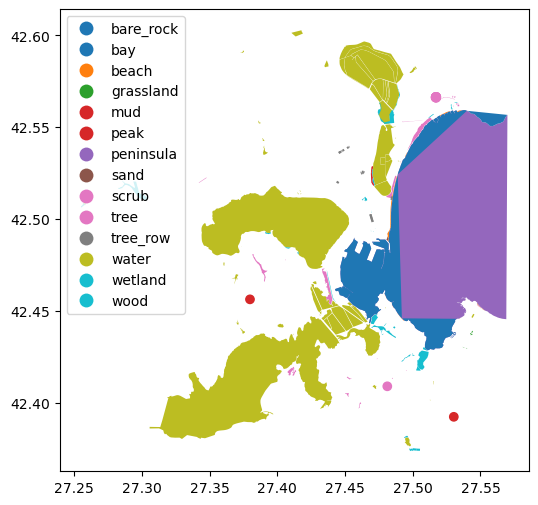

In [16]:
natural = osm3.get_natural()
natural.plot(column='natural', legend=True, figsize=(10,6))

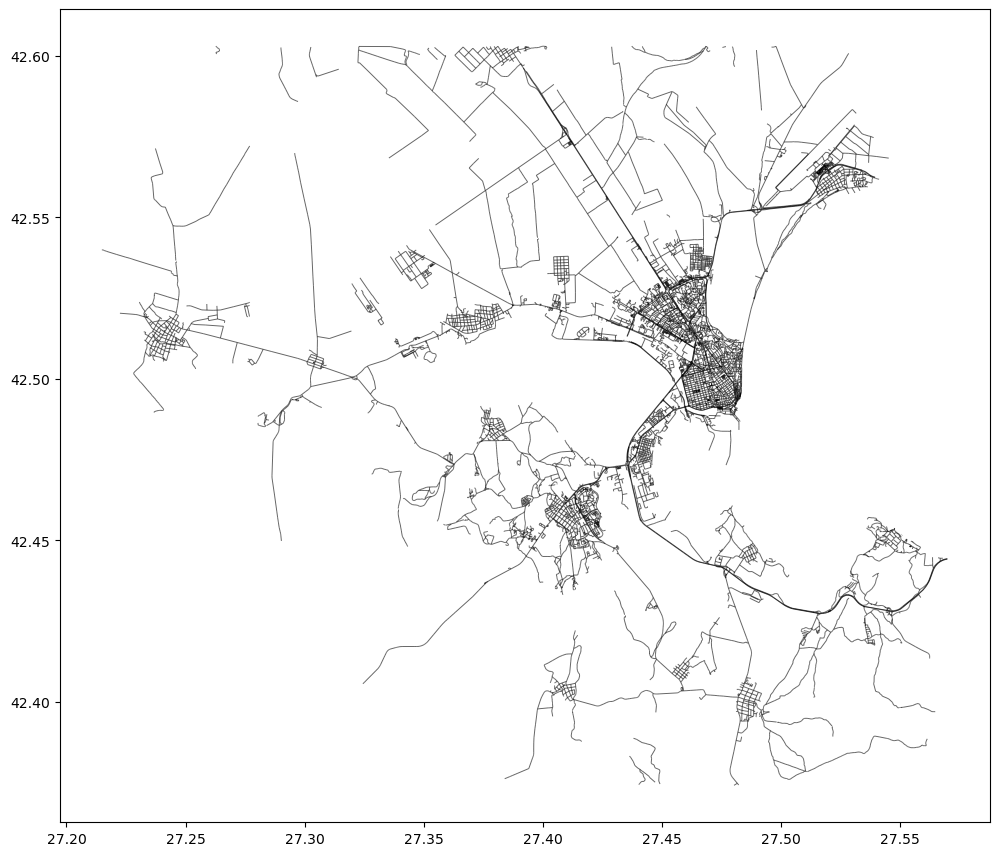

In [13]:
walk = osm3.get_network("walking")
walk.plot(color="k", figsize=(12,12), lw=0.7, alpha=0.6)

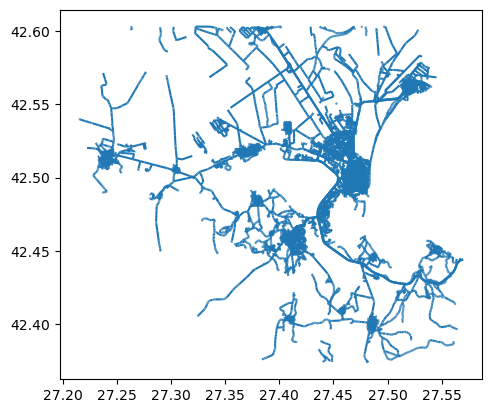

In [22]:
burgas_cycling = osm3.get_network(network_type = "cycling")
burgas_cycling['geom_type'] = burgas_cycling.geometry.geom_type
burgas_cycling.plot()

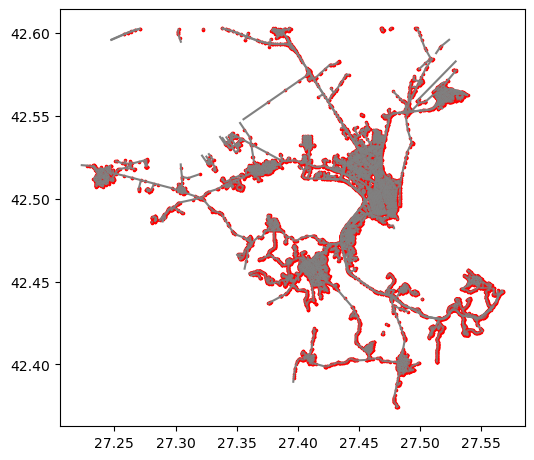

In [14]:
nodes, edges = osm3.get_network(nodes=True, network_type="driving")

# Plot nodes and edges on a map
ax = edges.plot(figsize=(6,6), color="gray")
ax = nodes.plot(ax=ax, color="red", markersize=2.5)